# Úkol č. 4 - regrese
**Deadline úkolu je uveden na [course pages](https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html).**

  * Cílem tohoto úkolu je vyzkoušet si řešit regresní problém na reálných datech.
  
> **Nejdůležitější na úkolu je to, abyste udělali vše procesně správně: korektní rozdělení datasetu, ladění hyperparametrů, vyhodnocení výsledků atp.**

## Dataset

  * Zdrojem dat je soubor `LifeExpectancyData.csv` na course pages (originál zde: https://www.kaggle.com/kumarajarshi/life-expectancy-who).
  * Popis datasetu najdete na uvedené stránce s originálem datasetu.
  * Cílová (vysvětlovaná) proměnná se jmenuje `Life expectancy `.
  

## Pokyny k vypracování
Body zadání, za jejichž (poctivé) vypracování získáte 12 bodů:

  1. Odeberte z dat body u kterých neznáte vysvětlovanou proměnnou.
  1. Rozdělte data na trénovací a testovací množinu.
  1. Proveďte základní průzkum dat. Na jeho základě adekvátně reagujte na problematické věci v datech (chybějící hodnoty, atd.).
  1. Aplikujte lineární a hřebenovou regresi a výsledky řádně vyhodnoťte:
    * K měření chyby použijte `mean_absolute_error`.
    * Experimentujte s tvorbou nových příznaků (na základě těch dostupných).
    * Experimentujte se standardizací/normalizací dat.
    * Vyberte si hyperparametry modelů k ladění a najděte jejich nejlepší hodnoty.
  1. Použijte i jiný model než jen lineární a hřebenovou regresi.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte tento Jupyter Notebook.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [4]:
### odtud už je to Vaše
import pandas as pd
df = pd.read_csv('LifeExpectancyData.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [7]:
#priprava dat 

In [8]:
#doplneme Life expectancy
df['Life expectancy ']=df['Life expectancy '].fillna(value=df['Life expectancy '].mean())


In [9]:
#odstranime nulove hodnoty
df = df.dropna()

In [10]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


In [11]:
def assign_Status(row):
    
    if row['Status'] == 'Developing':
        row['Status'] = 1
    else:
        row['Status'] = 0
    return row
df = df.apply(lambda row: assign_Status(row), axis=1)

In [12]:
#odstranime daty ktere nepotrebujeme
df_stat = df['Country']
df = df.drop(columns=['Country','Year'])

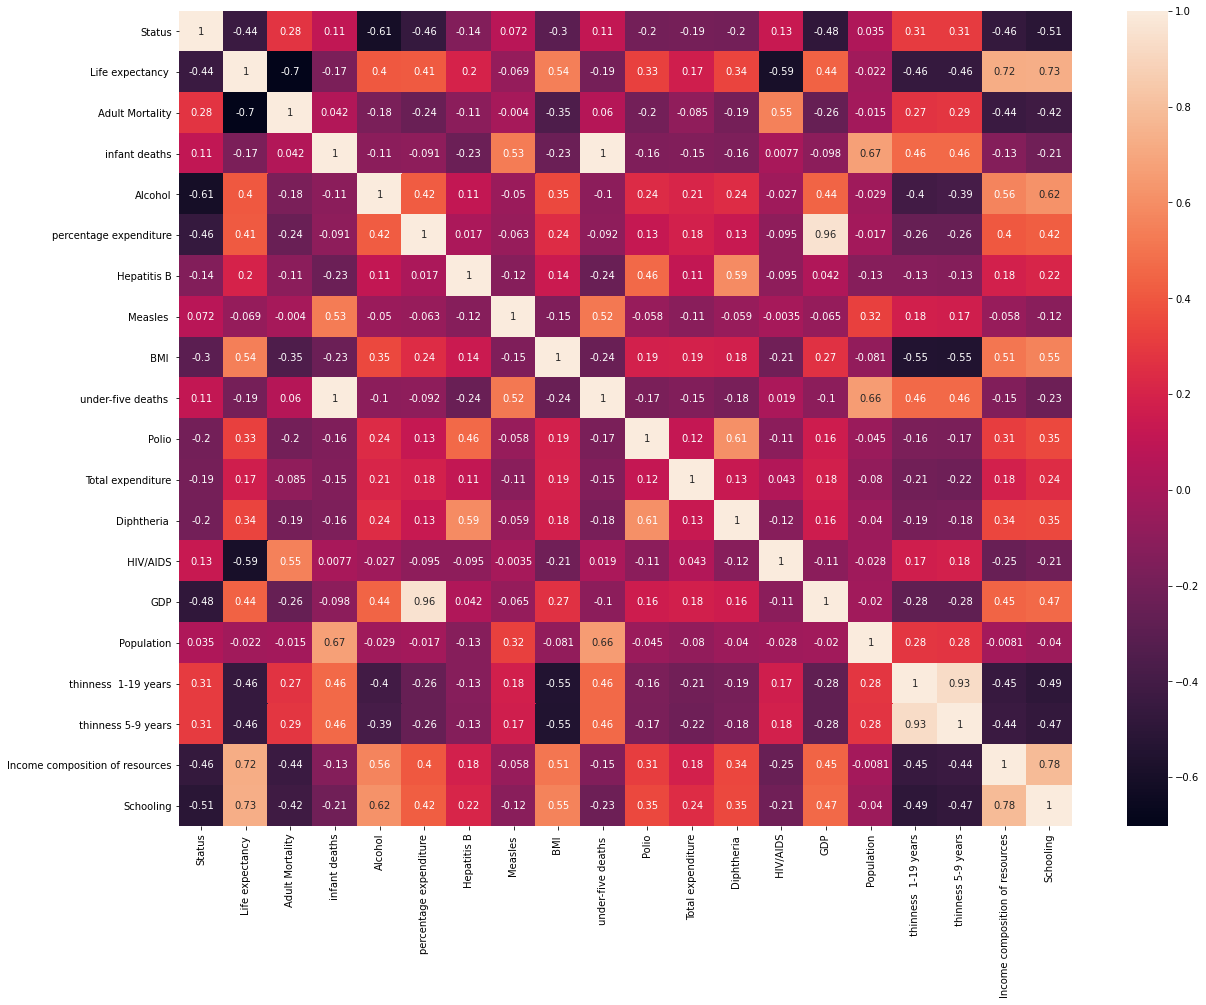

In [13]:
def get_corel(l):
    plt.subplots(figsize=(20,15))
    sns.heatmap(l.corr(), annot=True)
get_corel(df)


In [14]:
def print_corr(df):
    cor = df.corr()
    ind = cor.index
    cor = cor.unstack()
    sorted_pairs = cor.sort_values(kind="quicksort")
    strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.8]
    for i in range(0, len(strong_pairs)):
        if (strong_pairs.index[i][0] != strong_pairs.index[i][1]) and i%2==0:
            print(strong_pairs.index[i][0], "\t", strong_pairs.index[i][1] ,"\t korelacie", strong_pairs[i])
print_corr(df)
#odstranit muzeme jenom ty priznaky ktere maji korelaciu 
#vice nez 0.8 nebo 0.9 a mame jen 3 takova para

 thinness  1-19 years 	  thinness 5-9 years 	 korelacie 0.9279134442386372
percentage expenditure 	 GDP 	 korelacie 0.9592988569672177
infant deaths 	 under-five deaths  	 korelacie 0.9969056219353256


In [15]:
#psali jste ze mam normalizovat daty pozdej ale tady napsano ze mam to udelat pred tim nez pouzivat PCA 
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
def get_PCA(df):
    df_up = df[[' thinness  1-19 years', ' thinness 5-9 years', 'GDP', 'percentage expenditure', 'infant deaths', 'under-five deaths ']]
    scal = StandardScaler()
    x = scal.fit_transform(df_up)
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['thinness', 'GDP', 'infant deaths'])
    principalDf = principalDf.set_index(df.index)
    return principalDf
new_df = get_PCA(df)
df_1 = df.drop([' thinness  1-19 years', ' thinness 5-9 years', 'GDP', 'percentage expenditure', 'infant deaths', 'under-five deaths '], axis=1)
df_new = pd.concat([df_1, new_df], axis=1)

In [17]:
#nic sjednoсit uz nemuzeme 
print_corr(df_new)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           1649 non-null   int64  
 1   Life expectancy                  1649 non-null   float64
 2   Adult Mortality                  1649 non-null   float64
 3   infant deaths                    1649 non-null   int64  
 4   Alcohol                          1649 non-null   float64
 5   percentage expenditure           1649 non-null   float64
 6   Hepatitis B                      1649 non-null   float64
 7   Measles                          1649 non-null   int64  
 8    BMI                             1649 non-null   float64
 9   under-five deaths                1649 non-null   int64  
 10  Polio                            1649 non-null   float64
 11  Total expenditure                1649 non-null   float64
 12  Diphtheria          

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           1649 non-null   int64  
 1   Life expectancy                  1649 non-null   float64
 2   Adult Mortality                  1649 non-null   float64
 3   Alcohol                          1649 non-null   float64
 4   Hepatitis B                      1649 non-null   float64
 5   Measles                          1649 non-null   int64  
 6    BMI                             1649 non-null   float64
 7   Polio                            1649 non-null   float64
 8   Total expenditure                1649 non-null   float64
 9   Diphtheria                       1649 non-null   float64
 10   HIV/AIDS                        1649 non-null   float64
 11  Population                       1649 non-null   float64
 12  Income composition o

In [20]:
#mame 2 datasety df a df_new
#rezdelime data
xtrain, ytrain = train_test_split(df, test_size=0.25, random_state=42) 
xtrain_1, ytrain_1 = train_test_split(df, test_size=0.25, random_state=42) 

In [21]:
import math
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
import sklearn

In [22]:
from sklearn.model_selection import KFold

def get_X_Y_data(data):
    X = data.drop(columns=['Life expectancy '])
    Y = data['Life expectancy ']
    return X, Y 


def normalizace(Xtrain, Xval, model):
    model.fit_transform(Xtrain)
    XXtrain = model.transform(Xtrain)
    XXval = model.transform(Xval)
    return XXtrain, XXval, model




def cross_validation(data, model_g, name : str):
    score_morm = 0
    best_norm = []
    for train, val in KFold(5, True,42).split(data):
        x_train, y_train = get_X_Y_data(data[data.index.isin(train)])
        x_val, y_val = get_X_Y_data(data[data.index.isin(val)])
        norm_mod = [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler()]
        for i in norm_mod:
            x_train_norm, Y_train_norm, MinMax = normalizace(x_train, x_val, i)
            model_norm = sklearn.base.clone(model_g)
            model_norm.fit(x_train_norm, y_train)
            #sk = model_norm.score(Y_train_norm, y_val)
            sk  = mean_absolute_error(model_norm.predict(x_train_norm),y_train)
            best_norm.append([model_norm, sk, MinMax])      
    sk = 100000
    mod_norm = 0
    norm = best_norm[0][2]
    for i in range(0, len(best_norm)):
        if sk > best_norm[i][1]:
            sk = best_norm[i][1]
            mod_norm = best_norm[i][0]
            norm = best_norm[i][2]
    return [mod_norm, sk,name, norm] 

In [23]:
def Linear_f(xtrain, ytrain, res):
    Linear = LinearRegression()
    ans = cross_validation(xtrain, Linear, 'LinearRegression')
    y_train , y_test = get_X_Y_data(ytrain)
    y_train = ans[3].transform(y_train)
    print("mean_absolute_error ", mean_absolute_error(ans[0].predict(y_train),y_test),"\nmodel", ans[2], "\nscore ", ans[1], "\nnormalizace", ans[3], "\n")
    ans.append(mean_absolute_error(ans[0].predict(y_train),y_test))
    res.append(ans)
    return

In [24]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV
def Rid_f(xtrain, ytrain, res):
    Rid = Ridge()
    ans = cross_validation(xtrain, Rid, 'Ridge')
    y_train , y_test = get_X_Y_data(ytrain)
    y_train = ans[3].transform(y_train)
    print("mean_absolute_error ", mean_absolute_error(ans[0].predict(y_train),y_test),"\nmodel", ans[2], "\nscore ", ans[1], "\nnormalizace", ans[3], "\n")
    ans.append(mean_absolute_error(ans[0].predict(y_train),y_test))
    res.append(ans)
    return

In [25]:
def RidgeCV_f(xtrain, ytrain, res):
    Ridcv = RidgeCV()
    ans = cross_validation(xtrain, Ridcv, 'RidgeCV')
    y_train , y_test = get_X_Y_data(ytrain)
    y_train = ans[3].transform(y_train)
    print("mean_absolute_error ", mean_absolute_error(ans[0].predict(y_train),y_test),"\nmodel", ans[2], "\nscore ", ans[1], "\nnormalizace", ans[3], "\n")
    ans.append(mean_absolute_error(ans[0].predict(y_train),y_test))
    res.append(ans)
    return

In [26]:
def Lasso_f(xtrain, ytrain, res):
    las = Lasso()
    ans = cross_validation(xtrain, las, 'Lasso')
    y_train , y_test = get_X_Y_data(ytrain)
    y_train = ans[3].transform(y_train)
    print("mean_absolute_error ", mean_absolute_error(ans[0].predict(y_train),y_test),"\nmodel", ans[2], "\nscore ", ans[1], "\nnormalizace", ans[3], "\n")
    ans.append(mean_absolute_error(ans[0].predict(y_train),y_test))
    res.append(ans)
    return

In [27]:
def Rid_f_param(xtrain, ytrain, res):
    array = [10,25,50,100, 200, 230, 250,265, 270, 275, 290, 300, 500]
    best = []
    for i in array:
        Rid = Ridge(alpha = i)
        ans = cross_validation(xtrain, Rid, 'Ridge')
        y_train , y_test = get_X_Y_data(ytrain)
        y_train = ans[3].transform(y_train)
        best.append(ans)
    ans = []
    score = 10000000
    for i in best:
        if mean_absolute_error(i[0].predict(y_train),y_test)<score:
            ans = i
            score = mean_absolute_error(i[0].predict(y_train),y_test)
    print("mean_absolute_error ", mean_absolute_error(ans[0].predict(y_train),y_test),"\nmodel", ans[2], "\nscore ", ans[1], "\nnormalizace", ans[3], "\n")
    ans.append(mean_absolute_error(ans[0].predict(y_train),y_test))
    res.append(ans)
    return

In [28]:
def Lasso_f_param(xtrain, ytrain, res):
    array = [10,25,50,100, 200, 230, 250,265, 270, 275, 290, 300, 500]
    best = []
    for i in array:
        las = Lasso(alpha = i)
        ans = cross_validation(xtrain, las, 'Lasso')
        y_train , y_test = get_X_Y_data(ytrain)
        y_train = ans[3].transform(y_train)
        best.append(ans)
    ans = []
    score = 10000000
    for i in best:
        if mean_absolute_error(i[0].predict(y_train),y_test)<score:
            ans = i
            score = mean_absolute_error(i[0].predict(y_train),y_test)
    print("mean_absolute_error ", mean_absolute_error(ans[0].predict(y_train),y_test),"\nmodel", ans[2], "\nscore ", ans[1], "\nnormalizace", ans[3], "\n")
    ans.append(mean_absolute_error(ans[0].predict(y_train),y_test))
    res.append(ans)
    return

In [29]:
import warnings
warnings.filterwarnings('ignore')
#prvni dataset bez PCA
res_1 = []
Linear_f(xtrain, ytrain, res_1)
Rid_f(xtrain, ytrain, res_1)
RidgeCV_f(xtrain, ytrain, res_1)
Lasso_f(xtrain, ytrain, res_1)
Rid_f_param(xtrain, ytrain, res_1)
Lasso_f_param(xtrain, ytrain, res_1)

mean_absolute_error  2.9364824747873044 
model LinearRegression 
score  2.5500927338499113 
normalizace StandardScaler() 

mean_absolute_error  2.927902632451416 
model Ridge 
score  2.549243491164388 
normalizace RobustScaler() 

mean_absolute_error  2.921916659020313 
model RidgeCV 
score  2.5404004862496046 
normalizace StandardScaler() 

mean_absolute_error  3.132922353887417 
model Lasso 
score  2.9557523547602575 
normalizace StandardScaler() 

mean_absolute_error  2.899195713935655 
model Ridge 
score  2.617954558054709 
normalizace StandardScaler() 

mean_absolute_error  6.466977404626818 
model Lasso 
score  5.718354241797901 
normalizace RobustScaler() 



In [30]:
#druhy dataset s PCA
res_2 = []
Linear_f(xtrain_1, ytrain_1, res_2)
Rid_f(xtrain_1, ytrain_1, res_2)
RidgeCV_f(xtrain_1, ytrain_1, res_2)
Lasso_f(xtrain_1, ytrain_1, res_2)
Rid_f_param(xtrain_1, ytrain_1, res_2)
Lasso_f_param(xtrain_1, ytrain_1, res_2)


mean_absolute_error  2.9364824747873044 
model LinearRegression 
score  2.5500927338499113 
normalizace StandardScaler() 

mean_absolute_error  2.927902632451416 
model Ridge 
score  2.549243491164388 
normalizace RobustScaler() 

mean_absolute_error  2.921916659020313 
model RidgeCV 
score  2.5404004862496046 
normalizace StandardScaler() 

mean_absolute_error  3.132922353887417 
model Lasso 
score  2.9557523547602575 
normalizace StandardScaler() 

mean_absolute_error  2.899195713935655 
model Ridge 
score  2.617954558054709 
normalizace StandardScaler() 

mean_absolute_error  6.466977404626818 
model Lasso 
score  5.718354241797901 
normalizace RobustScaler() 



In [31]:
#zkusime pridat stat 

In [32]:
dummy=pd.get_dummies(df_stat)
df_country=pd.concat([df,dummy],axis=1)
df_country_new=pd.concat([df_new,dummy],axis=1)

In [33]:
xtrain_country, ytrain_country = train_test_split(df_country, test_size=0.25, random_state=42) 
xtrain_1_country, ytrain_1_country = train_test_split(df_country_new, test_size=0.25, random_state=42) 

In [34]:
res_1_stat = []
Linear_f(xtrain_country, ytrain_country, res_1_stat)
Rid_f(xtrain_country, ytrain_country, res_1_stat)
RidgeCV_f(xtrain_country, ytrain_country, res_1_stat)
Lasso_f(xtrain_country, ytrain_country, res_1_stat)
Rid_f_param(xtrain_country, ytrain_country, res_1_stat)
Lasso_f_param(xtrain_country, ytrain_country, res_1_stat)


mean_absolute_error  2.759804014664012 
model LinearRegression 
score  0.8395207970206827 
normalizace MinMaxScaler() 

mean_absolute_error  2.720952023237671 
model Ridge 
score  0.8388425475591639 
normalizace StandardScaler() 

mean_absolute_error  2.720952023231645 
model RidgeCV 
score  0.8388425475585934 
normalizace StandardScaler() 

mean_absolute_error  3.128049295295554 
model Lasso 
score  2.9455396363789514 
normalizace StandardScaler() 

mean_absolute_error  2.5563532096215056 
model Ridge 
score  1.060380014563391 
normalizace StandardScaler() 

mean_absolute_error  6.466977404626818 
model Lasso 
score  5.718354241797901 
normalizace RobustScaler() 



In [35]:
res_2_stat = []
Linear_f(xtrain_1_country, ytrain_1_country, res_2_stat)
Rid_f(xtrain_1_country, ytrain_1_country, res_2_stat)
RidgeCV_f(xtrain_1_country, ytrain_1_country, res_2_stat)
Lasso_f(xtrain_1_country, ytrain_1_country, res_2_stat)
Rid_f_param(xtrain_1_country, ytrain_1_country, res_2_stat)
Lasso_f_param(xtrain_1_country, ytrain_1_country, res_2_stat)


mean_absolute_error  5595135727618.244 
model LinearRegression 
score  0.8384007352941175 
normalizace MinMaxScaler() 

mean_absolute_error  2.7098881531917076 
model Ridge 
score  0.838057581565003 
normalizace StandardScaler() 

mean_absolute_error  2.7098881531947314 
model RidgeCV 
score  0.8380575815646764 
normalizace StandardScaler() 

mean_absolute_error  3.09278110408665 
model Lasso 
score  2.975575150533736 
normalizace StandardScaler() 

mean_absolute_error  2.5672446772032282 
model Ridge 
score  1.0549066632743218 
normalizace StandardScaler() 

mean_absolute_error  6.4310725404174605 
model Lasso 
score  6.092167142743546 
normalizace RobustScaler() 



In [36]:
def get_best_model(arr):
    ans = []
    score = 10000000000
    for i in arr:
        if i[4]<score:
            score = i[4]
            ans = i
    return ans

In [37]:
print(get_best_model(res_1))
print(get_best_model(res_2))
print(get_best_model(res_1_stat))
print(get_best_model(res_2_stat))
#vidime ze ve 3 datasetu se statem a bez pca je nejlepsi model
#[Ridge(alpha=50), 1.060380014563391, 'Ridge', StandardScaler(), 2.5563532096215056]
#mean_absolute_error  2.5563532096215056

[Ridge(alpha=50), 2.617954558054709, 'Ridge', StandardScaler(), 2.899195713935655]
[Ridge(alpha=50), 2.617954558054709, 'Ridge', StandardScaler(), 2.899195713935655]
[Ridge(alpha=50), 1.060380014563391, 'Ridge', StandardScaler(), 2.5563532096215056]
[Ridge(alpha=50), 1.0549066632743218, 'Ridge', StandardScaler(), 2.5672446772032282]


In [38]:
def Rid_f_param_my(xtrain, ytrain, res, array):
    best = []
    for i in array:
        Rid = Ridge(alpha = i)
        ans = cross_validation(xtrain, Rid, 'Ridge')
        y_train , y_test = get_X_Y_data(ytrain)
        y_train = ans[3].transform(y_train)
        best.append(ans)
    ans = []
    score = 10000000
    for i in best:
        if mean_absolute_error(i[0].predict(y_train),y_test)<score:
            ans = i
            score = mean_absolute_error(i[0].predict(y_train),y_test)
    print("mean_absolute_error ", mean_absolute_error(ans[0].predict(y_train),y_test),"\nmodel", ans[2], "\nscore ", ans[1], "\nnormalizace", ans[3], "\n")
    ans.append(mean_absolute_error(ans[0].predict(y_train),y_test))
    res.append(ans)
    return

In [39]:
#Vyberte si hyperparametry modelů k ladění a najděte jejich nejlepší hodnoty
res_1_best = []
array = []
for i in range(25, 100, 5):
    array.append(i)
Rid_f_param_my(xtrain_country, ytrain_country, res_1_best, array)

mean_absolute_error  2.554090753171035 
model Ridge 
score  1.0130943623800988 
normalizace StandardScaler() 



In [40]:
res_1_best

[[Ridge(alpha=40),
  1.0130943623800988,
  'Ridge',
  StandardScaler(),
  2.554090753171035]]

In [41]:
res_1_best = []
array = []
for i in range(35, 36):
    array.append(i)
Rid_f_param_my(xtrain_country, ytrain_country, res_1_best, array)

mean_absolute_error  2.5545328327538965 
model Ridge 
score  0.9883904464284625 
normalizace StandardScaler() 



In [42]:
res_1_best

[[Ridge(alpha=35),
  0.9883904464284625,
  'Ridge',
  StandardScaler(),
  2.5545328327538965]]

In [43]:
#podle cross_validace nejlepsi hodnota je 35 ale podle testovacich dat 45

In [44]:
#import tensorflow as tf

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
#Použijte i jiný model než jen lineární a hřebenovou regresi.

def RandomForest_f(xtrain, ytrain, res):
    RandomForest = RandomForestRegressor()
    ans = cross_validation(xtrain, RandomForest, 'RandomForest')
    y_train , y_test = get_X_Y_data(ytrain)
    y_train = ans[3].transform(y_train)
    print("mean_absolute_error ", mean_absolute_error(ans[0].predict(y_train),y_test),"\nmodel", ans[2], "\nscore ", ans[1], "\nnormalizace", ans[3], "\n")
    ans.append(mean_absolute_error(ans[0].predict(y_train),y_test))
    res.append(ans)
    return

In [47]:
res_3 = []
RandomForest_f(xtrain, ytrain, res_3)
RandomForest_f(xtrain_1, ytrain_1, res_3)
RandomForest_f(xtrain_country, ytrain_country, res_3)
RandomForest_f(xtrain_1_country, ytrain_1_country, res_3)
#xtrain, ytrain xtrain_1, ytrain_1 xtrain_country, ytrain_country xtrain_1_country, ytrain_1_country

mean_absolute_error  1.794171912832933 
model RandomForest 
score  0.47748000000000035 
normalizace RobustScaler() 

mean_absolute_error  1.7732542372881401 
model RandomForest 
score  0.4673058823529443 
normalizace RobustScaler() 

mean_absolute_error  1.8065302663438298 
model RandomForest 
score  0.46186117647058667 
normalizace MinMaxScaler() 

mean_absolute_error  1.7904915254237317 
model RandomForest 
score  0.4621270588235279 
normalizace MaxAbsScaler() 

